In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from IPython.display import Image

from decisiontree.dt_goal_recogniser import HandcraftedGoalTrees, TrainedDecisionTrees
from evaluation.verification import add_goal_tree_model, extract_counter_example
from core.data_processing import get_dataset
from core.feature_extraction import FeatureExtractor
from core.scenario import ScenarioConfig, Scenario
from core.base import get_data_dir, get_scenario_config_dir, get_img_dir
from core.lanelet_helpers import LaneletHelpers

In [2]:
scenario_name = 'round'
scenario = Scenario.load(get_scenario_config_dir() + '{}.json'.format(scenario_name))

In [3]:
episode = scenario.load_episode(4)

ID -152225: Linestring type must be specified
ID -152321: Linestring type must be specified


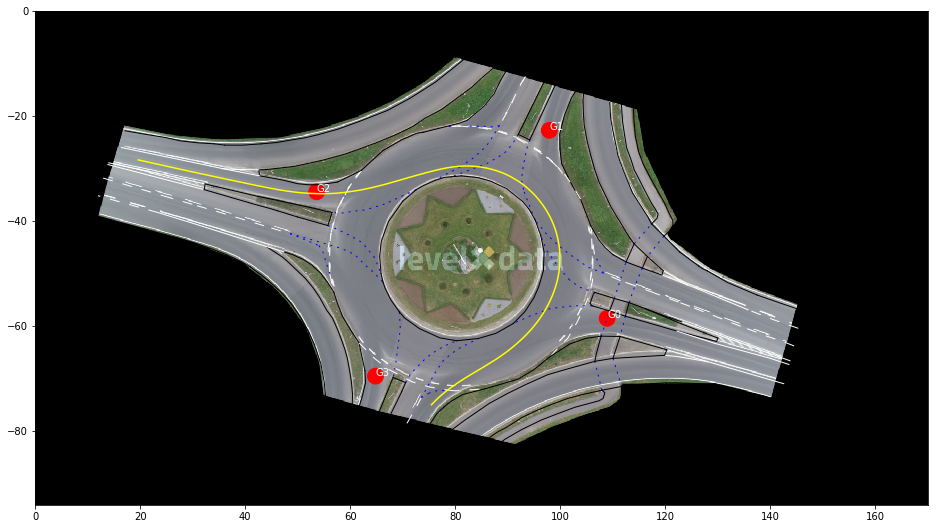

In [4]:
plt.figure(figsize=(16,12))
scenario.plot()
episode.agents[12].plot_trajectory(color='yellow')

In [5]:
dataset = get_dataset(scenario_name, 'test')

In [9]:
dataset.loc[(dataset.agent_id==12) & (dataset.episode==4) & (dataset.possible_goal==0)]

,path_to_goal_length,in_correct_lane,speed,acceleration,angle_in_lane,vehicle_in_front_dist,vehicle_in_front_speed,oncoming_vehicle_dist,goal_type,agent_id,possible_goal,true_goal,true_goal_type,frame_id,initial_frame_id,fraction_observed,episode
0,38.718832,True,4.4008,0.8513,0.177775,18.693621,7.0198,11.314299,exit-roundabout,12,0,2,exit-roundabout,0,0,0.0,4
4,31.232126,True,5.3106,0.3948,-0.030736,22.069720,7.8603,1.477630,exit-roundabout,12,0,2,exit-roundabout,36,0,0.1,4
8,22.817727,True,5.7981,0.1809,0.306225,100.000000,20.0000,14.837297,exit-roundabout,12,0,2,exit-roundabout,72,0,0.2,4
12,142.469694,True,5.9992,0.0785,0.023099,30.461242,8.8163,5.938429,exit-roundabout,12,0,2,exit-roundabout,108,0,0.3,4
16,133.080416,True,6.1337,-0.1355,0.018486,21.587991,7.8927,-3.450849,exit-roundabout,12,0,2,exit-roundabout,144,0,0.4,4
20,123.502409,True,5.9752,-0.2288,-0.020266,18.208713,7.8947,-13.216694,exit-roundabout,12,0,2,exit-roundabout,180,0,0.5,4
24,114.226088,True,5.8524,-0.1209,0.067300,19.174517,8.8715,-4.233712,exit-roundabout,12,0,2,exit-roundabout,216,0,0.6,4
28,104.634821,True,5.8604,-0.0281,0.013554,18.428527,9.1750,-14.555735,exit-roundabout,12,0,2,exit-roundabout,252,0,0.7,4
32,94.901561,True,6.1872,0.2743,0.049269,14.238307,6.5084,-14.991238,exit-roundabout,12,0,2,exit-roundabout,288,0,0.8,4
36,83.845695,True,6.7748,0.3980,-0.255689,23.316880,9.1107,40.095280,exit-roundabout,12,0,2,exit-roundabout,324,0,0.9,4
